# Лаба 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
f = lambda x1, x2 : np.array([1, x1, x1**2, x2**2, x2]) 
Q = np.array([1, 1, 0.01, 1, 0.01])
# xi = [-1, 1], i = 1, 2

In [3]:
u = lambda x1, x2: x1 + 0.01 * x1**2 + 0.01 * x2 + x2**2 + 1

Text(0.5, 0, 'U')

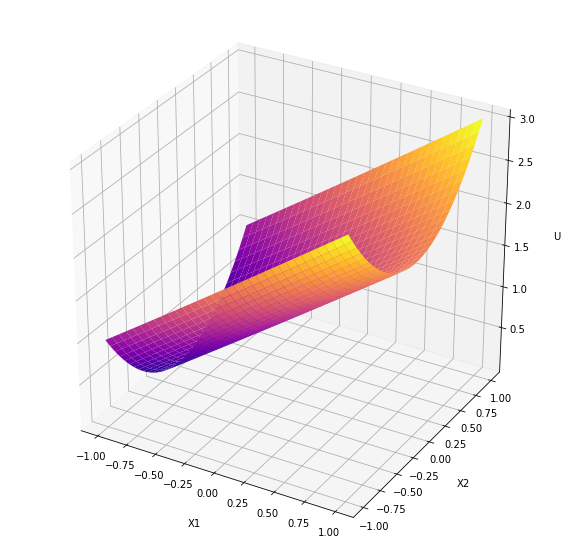

In [4]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
x1_val = np.linspace(-1, 1, 100)
x2_val = np.linspace(-1, 1, 100)
x1, x2 = np.meshgrid(x1_val, x2_val)
z = u(x1, x2)

surf = ax.plot_surface(x1, x2, z, rstride = 3, cstride = 3, cmap = cm.plasma)
ax.set_xlabel('X1', labelpad = 15)
ax.set_ylabel('X2', labelpad = 15)
ax.set_zlabel('U', labelpad = 15)

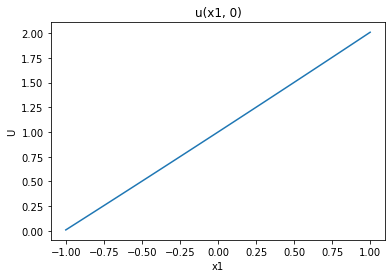

In [5]:
fig = plt.subplots()
x = np.linspace(-1, 1,100)
plt.plot(x, u(x, 0))
plt.title('u(x1, 0)')
plt.xlabel('x1')
plt.ylabel('U')
plt.show()

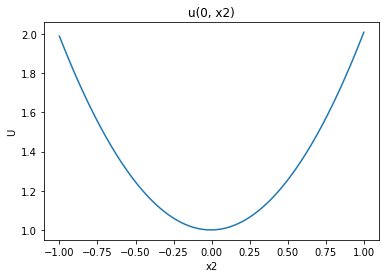

In [6]:
fig = plt.subplots()
x = np.linspace(-1, 1,100)
plt.plot(x, u(0, x))
plt.title('u(0, x2)')
plt.xlabel('x2')
plt.ylabel('U')
plt.show()

# Генерация данных

In [7]:
import random

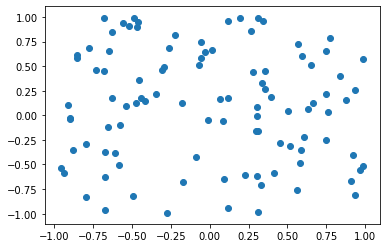

In [8]:
#генерим 100 точек
x = []
y = []
for i in range(100):
    x.append(random.uniform(-1,1))
    y.append(random.uniform(-1,1))

fig = plt.subplots()


plt.scatter(x, y)
plt.show()

In [9]:
import pandas as pd
df = pd.DataFrame(columns = ["i", "x1", "x2", "u"])
for i in range(len(x)):
    df.loc[i] = [i, x[i], y[i], u(x[i], y[i])]


In [10]:
vec_u = np.array(df.u)

In [11]:
mean = vec_u.mean()

In [12]:
w2 = np.dot(vec_u - mean, vec_u - mean)/(len(vec_u) - 1)

In [13]:
w2

0.40087281789362805

In [14]:
p = 0.1
sigma = (p*w2)**0.5
sigma

0.20021808557011728

# Лаба 2

## Неизвестная случайная ошибка (вроде бы e~N(0,sigma^2))

In [15]:
import scipy
from scipy import optimize

In [16]:
#Максимум функции
def ff(x):
    return -(x[0] + 0.01 * x[0]**2 + 0.01 * x[1] + x[1]**2 + 1)
bnds = ((-1,1), (-1, 1))
maxx = scipy.optimize.minimize(ff, [0, 0], method='SLSQP', bounds=bnds)
maxx = -maxx.fun
print(maxx) 

3.02


In [17]:
import math
y = []
for i in range(len(x)):
    y.append(df["u"][i] + random.choice([-1,1])*0.05*maxx )

In [18]:
f = lambda x1, x2 : [1, x1, x1**2, x2**2, x2]
X = []
for i in range(len(Q)):
    X.append([])
    for j in range(len(df['u'])):
        X[i].append(f(df['x1'][j],df['x2'][j])[i])
X = np.matrix(X)

In [19]:
Q1 = X.dot(X.T)
Q1 = np.linalg.inv(Q1)
Q1 = Q1.dot(X)
Q1 = Q1 * np.matrix(y).T
print(Q1)

[[ 1.00372663e+00]
 [ 1.01867330e+00]
 [-1.28951700e-04]
 [ 1.05150651e+00]
 [ 5.33726706e-02]]


In [20]:
e = []
e = y - (X.T).dot(np.matrix(Q).T).T
sigma2 = float(e.dot(e.T)/(len(df["u"])-len(Q)))
print(sigma2)
F = sigma2/sigma**2
print(F)

0.024001052631578947
0.5987198822232852
